# Geradores

## $ \pi^*$

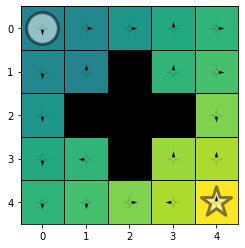

In [1]:
import numpy as np
from grid import Grid
from plot import plotPolicy, plotStateValue, plotActionStateValue, plotEffects, plotTrajectory

g = Grid()
g.pi_star(epsilon=.05)
# g.q_star()

ax = plotEffects(g)
plotPolicy(g.PI, g, ax=ax)
plotActionStateValue(g.Q, g, ax=ax)
# np.array([sum(q) for q in g.Q]).reshape(*g.size)
# g.PI
pi_star = g.PI

## $ h_1 $ 


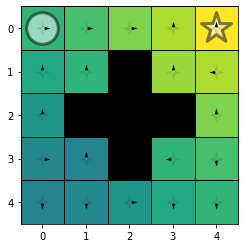

In [2]:
h1 = Grid()
target_1 = 4
h1.effects[(4,4)] = {'noise': lambda a: [-a[0], -a[1]]}
h1.effects[h1.S[target_1]] = {'terminal': True, 'reward': 10}

h1.pi_star(epsilon=.05)

ax = plotEffects(h1)
plotPolicy(h1.PI, h1, ax=ax)
plotActionStateValue(h1.Q, h1, ax=ax)

pi_1 = h1.PI

## $ h_2 $ 

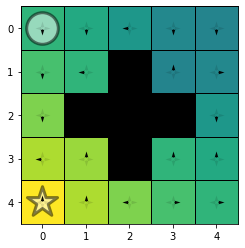

In [3]:
h2 = Grid()

target_2 = 20
h2.effects[(4,4)] = {'noise': lambda a: [-a[0], -a[1]]}
h2.effects[h2.S[target_2]] = {'terminal': True, 'reward': 10}

h2.pi_star(epsilon=.05)

ax = plotEffects(h2)
plotPolicy(h2.PI, h2, ax=ax)
plotActionStateValue(h2.Q, h2, ax=ax)

pi_2 = h2.PI

## $ \xi $

$ \eta(h|s) = \{^{.95 \;\; se \;\; s \in S^h}_{.05 \;\; se \;\; s \notin S^h} \;\; \forall h \in \mathcal{H} \; e \; \forall s \in S$ <br>
$ \pi_h(a|s) = \{^{.9625 \;\; se \;\; a = a^*}_{.0125 \;\; se \;\; a \ne a^*}  \;\; \forall a \in A \; e \; \forall s \in S$ <br>
$ \psi_h(s) = 0.3 \;\; \forall s \in S$

In [4]:
def generateTheta(S, eta=None, pis=None, psis=None):
    if eta is None:
        eta = {
            0: list(set(range(10, 25)) - {14}),
            1: list(range(10))+[14], 
        }
    if psis is None:
        psis = [[.3 for _ in g.S]]*2
    if pis is None: 
        pis = [pi_1, pi_2]
    
    H = list(zip(pis, psis))
    _eta = np.array([[.95 if s in eta[h] else .05 for h,_ in enumerate(H)] for s,_ in enumerate(S)])

    return H, _eta
    
generateTheta(g.S)

([(array([[0.0125, 0.0125, 0.9625, 0.0125],
          [0.0125, 0.0125, 0.9625, 0.0125],
          [0.0125, 0.0125, 0.9625, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.0125, 0.0125, 0.0125, 0.9625],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.0125, 0.0125, 0.9625, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.9625, 0.0125, 0.0125, 0.0125],
          [0.0125, 0.0125, 0.0125, 0.9625],
          [0.0125, 0.9625, 0.0125, 0.0125],
          [0.0125, 0.9625, 0.0125, 0.0125],
          [0.0125, 0.9625, 0.0125, 0.0125],
          [0.0125, 0.0125, 0.962

<AxesSubplot: >

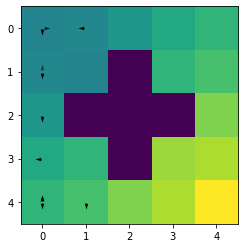

In [5]:
import random

def generateTrajetoryPi(pi, g, size=10):
    s = 0

    arr = []
    for _ in range(size-1):
        a  = random.choices(list(range(len(g.A))), pi[s], k=1)[0]
        step =  (s, a)
        s,_,_ = g.transition(s,  a)
        arr.append(step)
    arr.append((s, None))

    return arr

def generateTrajetory(H, eta, g, size=10):
    s = 0
    b = 1
    h = None
    arr = []
    for _ in range(size-1):
        if b == 1:
            h = random.choices(list(range(len(eta[s]))), eta[s], k=1)[0]
        
        pi, psi = H[h]
        
        a  = random.choices(list(range(len(pi[s]))), pi[s], k=1)[0]
        step =  (s, a)
        s,_,_ = g.transition(s,  a)
        arr.append(step)
        b = random.choices([0,1], [1-psi[s], psi[s]], k=1)[0]
    arr.append((s, None))

    return arr


tH = {1: list(range(10))+[14], 0: list(set(range(10, 25)) - {14}) }
psi_1 = [.3 for _ in g.S]
psi_2 = [.3 for _ in g.S]
H = [
    (pi_1, psi_1),
    (pi_2, psi_2)
]
eta = np.array([[.95 if s in tH[h] else .05 for h,_ in enumerate(H)] for s,_ in enumerate(g.S)])

E = generateTrajetory(H, eta, g, 15)
# E = generateTrajetoryPi(pi_star, g)

# ax = plotEffects(g)
# plotPolicy(h_2.PI, h_2, ax=ax)
ax = plotTrajectory(E, g)
plotActionStateValue(g.Q, g, ax=ax)

# Experimentação

In [7]:
from ddo import DDO 

ddo = DDO(E, H, eta)

print(ddo.posterior(0))
print(ddo.expectation_gradient())

1.5640403905908647e-06
-0.31348130388900586


In [181]:
def get_likelihood_from_theta(E, psi):
    H, eta = generateTheta(g.S, psis=psi)
    ddo = DDO(E, H, eta)
    return ddo.posterior(0)
    # return ddo.expectation_gradient()

In [182]:
p1_psi = [[.1 for _ in g.S]]*2
p2_psi = [[.9 for _ in g.S]]*2
p3_psi = [[.5 for _ in g.S]]*2
p_star_psi = [psi_1, psi_2]

psis = [p1_psi, p2_psi, p3_psi] + [p_star_psi]

likes = [get_likelihood_from_theta(E, psi) for psi in psis]
likes

p = np.argmax(likes)
print(f'Maior: {p}\n', likes)

Maior: 3
 [1.0327172571874424e-06, 1.5586696162592333e-10, 1.0057488261647325e-06, 3.281891354445103e-06]


In [230]:
def experiment(theta=.3, episodes=100, size_range=(10,50)):
    thetas = [(i+1)*1/10 for i in range(9)]
    psis = [[[theta for _ in g.S]]*2 for theta in thetas]

    params = []
    err = []
    for i in range(episodes):
        E = generateTrajetory(*generateTheta(g.S, psis=[[theta for _ in g.S]]*2), g, random.randrange(*size_range))
        likes = [get_likelihood_from_theta(E, psi) for psi in psis]
        params.append(thetas[np.argmax(likes)])
        err.append((theta-thetas[np.argmax(likes)])**2)

    estimate = round(np.mean(params),1)
    # err = [cum_err/(i+1) for i,_ in enumerate(params)]
    
    return estimate, params, err

theta = .3
estimate, params, err = experiment(theta)
estimate

0.3

Text(0.5, 0, 'episode')

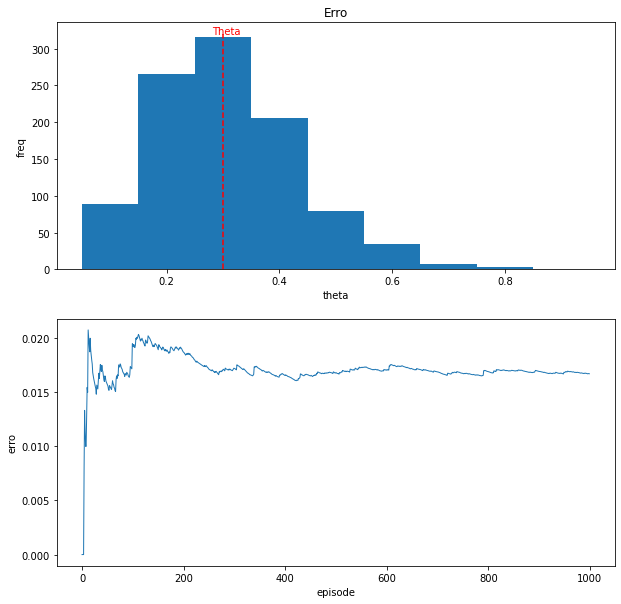

In [244]:
import matplotlib.pyplot as plt
from itertools import accumulate
from collections import Counter


theta = .3
estimate, params, err = experiment(theta, episodes=1000)

err_acum = [v/(i+1) for i,v in enumerate(list(accumulate(err)))]
freq = Counter(params)

fig, axs = plt.subplots(2,1, figsize=(10,10))

x = sorted(dict(freq))
y = [freq[i] for i in x]
m = max(freq.values())

axs[0].bar(x, y, width=.1)
axs[0].plot([theta for _ in range(m+5)], range(m+5), color='red', linestyle='dashed')
axs[0].text(theta-.02, m+4, 'param', color='red')
axs[0].set_title(f'Distribuição')
axs[0].set_ylabel('freq')
axs[0].set_xlabel('theta')

axs[0].set_title(f'Erro')
axs[1].plot(range(len(err_acum)),err_acum, linewidth=1)#, marker='.')
axs[1].set_ylabel('erro')
axs[1].set_xlabel('episode')

# Gradient Descent

In [12]:
def get_eg_from_theta(E, psi):
    H, eta = generateTheta(g.S, psis=psi)
    ddo = DDO(E, H, eta)
    return ddo.expectation_gradient()

In [46]:
import random 

def GradientDescent(E, S, param=None, learning_rate=.1, decay=.1, precision=1e-4, max_trials=1000):
    """
        Leaning Rate is changed with a Time-based learning schedule
    """
    if param is None:
        param = random.random()

    print(f'start at {param}')

    error = 1+precision
    trials = 0

    l = get_eg_from_theta(E, [[param for _ in S]]*2)
    while (error > precision) and (trials < max_trials):
        trials += 1
        
        new_param = param + learning_rate * get_eg_from_theta(E, [[param for _ in S]]*2)
        new_l = get_eg_from_theta(E, [[new_param for _ in S]]*2)
        error = np.abs(new_l - l)

        learning_rate = learning_rate / (1+decay*trials)
        # if new_l >= l:
        #     # learning_rate += (learning_rate * 0.2) 
        #     learning_rate += learning_rate / (1+decay*trials)
            # learning_rate += learning_rate / trials
            # l = new_l
            # param = new_param
        # else:
        #     # learning_rate -= (learning_rate * 0.2)
        #     learning_rate -= learning_rate / (1+decay*trials)
            # learning_rate -= learning_rate / trials
            
        yield param, error, learning_rate

def execute(f, all=False):
    result = [(param, error, learning_rate) for param, error, learning_rate  in f]
    return result if all else result[-1]
        

E = generateTrajetory(H, eta, g, 10)
print('estimative: ', execute(GradientDescent(E, g.S), True))

start at 0.7781726911466884
estimative:  [(0.7781726911466884, 3.148232848903149, 0.09090909090909091), (0.7781726911466884, 7.176388840954925, 0.07575757575757576), (0.7781726911466884, 111.48034136142299, 0.05827505827505827), (0.7781726911466884, 18.686288324532462, 0.041625041625041624), (0.7781726911466884, 11.87974787724122, 0.02775002775002775), (0.7781726911466884, 8.29584919021386, 0.01734376734376734), (0.7781726911466884, 5.769465696304468, 0.010202216084569022), (0.7781726911466884, 3.798489357826363, 0.005667897824760568), (0.7781726911466884, 2.3131331948215754, 0.002983104118295036), (0.7781726911466884, 1.2969728369866544, 0.001491552059147518), (0.7781726911466884, 0.6739056556981602, 0.0007102628853083419), (0.7781726911466884, 0.32777100244199353, 0.0003228467660492463), (0.7781726911466884, 0.15059970208033668, 0.00014036815915184622), (0.7781726911466884, 0.06581530160733351, 5.848673297993592e-05), (0.7781726911466884, 0.02748669021677408, 2.339469319197437e-05), 

In [73]:
get_eg_from_theta(generateTrajetory(*generateTheta(g.S), g, random.randrange(10,20)), [[0.175 for _ in g.S]]*2)

5.2198531567113875

In [47]:
param = None
learning_rate = .2
decay = .5

for _ in range(10):
    f = GradientDescent(generateTrajetory(*generateTheta(g.S), g, random.randrange(10,20)), g.S, param=param, learning_rate=learning_rate, decay=decay)
    l = execute(f, True)
    for param, _, learning_rate in l:
        print(round(param, 3), round(learning_rate,3))

start at 0.17507664541927315
0.175 0.133
0.175 0.067
0.175 0.027
0.175 0.009
0.175 0.003
0.175 0.001
0.175 0.0
0.175 0.0
0.175 0.0
0.175 0.0
0.175 0.0
0.175 0.0
start at 0.17507664541927315
0.175 0.0
start at 0.17507664541927315
0.175 0.0
start at 0.17507664541927315
0.175 0.0
start at 0.17507664541927315
0.175 0.0
start at 0.17507664541927315
0.175 0.0
start at 0.17507664541927315
0.175 0.0
start at 0.17507664541927315
0.175 0.0
start at 0.17507664541927315
0.175 0.0
start at 0.17507664541927315
0.175 0.0


In [ ]:
1/0

In [ ]:
def GradientDescent(Es, S, param=None, learning_rate=.1, decay=.09, precision=1e-5, max_trials=10000):
    """
        Leaning Rate is changed with a Time-based learning schedule
    """
    E = random.choice(Es)

    if param is None:
        param = random.random()

    print(f'start at {param}')

    error = 1+precision
    trials = 0

    l = get_eg_from_theta(E, [[param for _ in S]]*2)
    while (error > precision) and (trials < max_trials):
        trials += 1
        E = random.choice(Es)
        
        new_param = param + learning_rate * get_eg_from_theta(E, [[param for _ in S]]*2)
        new_l = get_eg_from_theta(E, [[new_param for _ in S]]*2)
        error = np.abs(new_l - l)

        if new_l >= l:
            # learning_rate += (learning_rate * 0.2) 
            learning_rate += learning_rate / (1+decay*trials)
            l = new_l
            param = new_param
        else:
            # learning_rate -= (learning_rate * 0.2)
            learning_rate -= learning_rate / (1+decay*trials)
        
        print(trials, '- param: ', param, " erro: ", error)
        yield param, error


n_trajectories = 10
range_size = (10, 15)

Es = [generateTrajetory(H, eta, g, random.randrange(*range_size)) for _ in range(n_trajectories)]
print('estimative', execute(GradientDescent(Es, g.S)))

start at 0.616872359434437
1 - param:  0.044550891622558875  erro:  36.91131181598372
2 - param:  0.044550891622558875  erro:  79.40291378574398
3 - param:  0.044550891622558875  erro:  30.25768122049739
4 - param:  0.044550891622558875  erro:  18.768986200881077
5 - param:  0.044550891622558875  erro:  6.812724868297778
6 - param:  0.044550891622558875  erro:  6.243345719480134
7 - param:  0.044550891622558875  erro:  0.6760360304740054
8 - param:  0.044550891622558875  erro:  2.039924756111507
9 - param:  0.044550891622558875  erro:  5.851633003057026
10 - param:  0.044550891622558875  erro:  1.9778164534490728
11 - param:  0.044550891622558875  erro:  27.28535567408008
12 - param:  0.044550891622558875  erro:  27.285528132998017
13 - param:  0.044550891622558875  erro:  5.634489110286342
14 - param:  0.044582359496433084  erro:  15.513204707142307
15 - param:  0.044582359496433084  erro:  17.672476647355925
16 - param:  0.044582359496433084  erro:  17.667356211570386
17 - param:  0.

In [ ]:
n_trajectories = 100
range_size = (10, 50)

Es = [generateTrajetory(H, eta, g, random.randrange(*range_size)) for _ in range(n_trajectories)]
print('estimative', execute(GradientDescent(Es, g.S, learning_rate=.08)))

start at 0.30877011549395883
estimative (1.1404167879836864, 10001, 93.728971963949)
